# Good Software - analysis notebook 2
## Reproducting all panels for Figure 2

This notebook contains all Python code necessary to reproduce all panels from the Figure 2 of our paper.

**Github**: https://github.com/smangul1/good.software

**Manuscript**:
    
Inspired by Thiago Mosqueiro

### Importing Libraries

In [36]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns  #be sure version >=0.9

In [80]:
def my_star(p_value):
    if p_value <= 0.001:
        return "***"
    elif p_value <= 0.01:
        return "**"
    elif p_value <= 0.05:
        return "*"
    else:
        return "None"
    

In [111]:
class my_colors: 
    red = (1.0,0.2,0.1)
    orange = (1.0,0.6,0.2)
    green = (0.3,0.9,0.3)
    blue = (0.3,0.7,1.0)
    
class my_params:
    fontsize = 14
    dot_size = 5

### Importing and Parsing Data

In [37]:
data = pd.read_csv('usability/usability_cleaned_data.csv')
data.head()

,Unnamed: 0,ID,Domain,Journal of Molecular Diagnostics,Year,Lapsed,Language,Update,Source,Source Control,...,Citations,Normalized citations,Releases,Error. Hard codding. Broken invalid link. Yes/No,Outdated Dependency,Commands,Commands Listed,Time To Install,Difficulty Status,Example Provided
0,1,mp1,mapping,Genome Biology,2009,10,C++,2017,Bioconda,Y,...,11226,1122.600000,30.0,N,N,1.0,1.0,5,2,Y
1,2,mp2,mapping,Bioinformatics,2013,6,C++,2017,Bioconda,Y,...,83,13.833333,36.0,N,N,1.0,1.0,5,2,Y
2,3,mp3,mapping,Bioinformatics,2012,7,C++,2014,Bioconda,N,...,36,5.142857,16.0,N,N,1.0,1.0,5,2,Y
3,4,mp4,mapping,Genome Biology,2004,15,C++,2017,Bioconda,N,...,2448,163.200000,7.0,N,N,1.0,1.0,5,2,Y
4,5,mp5,mapping,Bioinformatics,2009,10,C,2011,Bioconda,N,...,2474,247.400000,12.0,N,N,1.0,1.0,15,2,Y


### Clean Column Names for Filtering

In [38]:
data.columns = [c.replace(' ', '_') for c in data.columns]
print data.columns

Index([u'Unnamed:_0', u'ID', u'Domain', u'Journal_of_Molecular_Diagnostics',
       u'Year', u'Lapsed_', u'Language', u'Update', u'Source_',
       u'Source_Control', u'Reason', u'Citations', u'Normalized_citations',
       u'Releases', u'Error._Hard_codding._Broken_invalid_link._Yes/No',
       u'Outdated_Dependency', u'Commands', u'Commands_Listed',
       u'Time_To_Install', u'Difficulty_Status', u'Example_Provided'],
      dtype='object')


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
Unnamed:_0                                          98 non-null int64
ID                                                  98 non-null object
Domain                                              98 non-null object
Journal_of_Molecular_Diagnostics                    98 non-null object
Year                                                98 non-null int64
Lapsed_                                             98 non-null int64
Language                                            91 non-null object
Update                                              88 non-null object
Source_                                             98 non-null object
Source_Control                                      98 non-null object
Reason                                              22 non-null object
Citations                                           98 non-null int64
Normalized_citations                             

## FIGURE A: Overview of Tools based on Installation Difficulty

In [85]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==0)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

(0.25925925925925924, 0.6296296296296297, 0.2222222222222222)
(0, 0, 0.14814814814814814)
(0.7407407407407407, 0.37037037037037035, 0.6296296296296297)


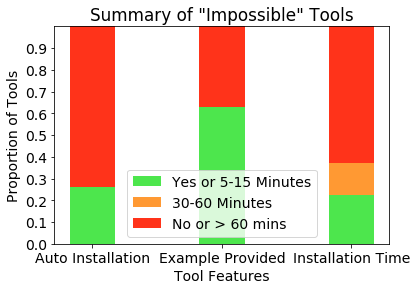

In [86]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)
print green

yellow = (0, 0, len(dif_30_60_time.index)/length)
print yellow

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)
print red



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

plt.ylabel('Proportion of Tools')
plt.xlabel('Tool Features')
plt.title('Summary of "Impossible" Tools')
plt.xticks(ind, ('Auto Installation', 'Example Provided', 'Installation Time'))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'))
plt.ylim(ymax=1.0)
plt.show()

In [88]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==1)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

(0.14285714285714285, 0.7619047619047619, 0.0)
(0, 0, 0.3333333333333333)
(0.8571428571428571, 0.23809523809523808, 0.6666666666666666)


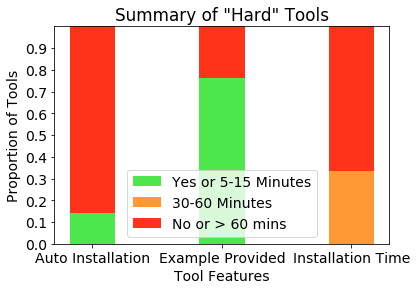

In [89]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)
print green

yellow = (0, 0, len(dif_30_60_time.index)/length)
print yellow

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)
print red



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

plt.ylabel('Proportion of Tools')
plt.xlabel('Tool Features')
plt.title('Summary of "Hard" Tools')
plt.xticks(ind, ('Auto Installation', 'Example Provided', 'Installation Time'))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'))
plt.ylim(ymax=1.0)
plt.show()

In [93]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==2)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

(0.78, 0.68, 1.0)
(0, 0, 0.0)
(0.22, 0.32, 0.0)


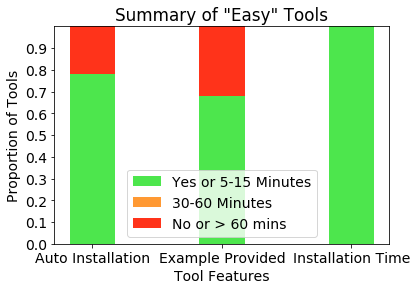

In [94]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)
print green

yellow = (0, 0, len(dif_30_60_time.index)/length)
print yellow

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)
print red



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

plt.ylabel('Proportion of Tools')
plt.xlabel('Tool Features')
plt.title('Summary of "Easy" Tools')
plt.xticks(ind, ('Auto Installation', 'Example Provided', 'Installation Time'))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'))
plt.ylim(ymax=1.0)
plt.show()

## FIGURE B: Summary Pie Charts of the Data
### FIGURE B.1: Complex, Easy, and Not Installed

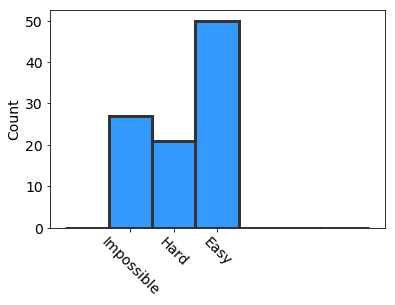

In [95]:
statuses = np.array(data["Difficulty_Status"])


f, ax = pl.subplots(1, 1)
ax.hist(statuses, np.arange(-1.5,6,1), edgecolor=(0.2,0.2,0.2), lw=3, 
            color=(0.2,0.6,1.0))

ax.set_ylabel('Count')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels( ['Impossible', 'Hard', 'Easy'], rotation=-45 )

pl.show()

In [96]:
#Lets get some data for a piechart regarding if Example is Provided
dif_status = data.groupby(['Difficulty_Status',]).size()
dif_status.head()

Difficulty_Status
0    27
1    21
2    50
dtype: int64

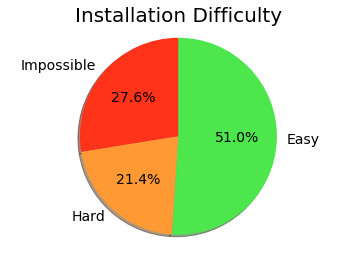

In [97]:
pl.rcParams['font.size'] = 14
labels = ['Impossible', 'Hard', 'Easy']
sizes = [dif_status[0], dif_status[1], dif_status[2]]
values = [my_colors.red, my_colors.orange, my_colors.green]
fig1, ax1 = pl.subplots()

ax1.set_title("Installation Difficulty", fontsize=20)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.show()

### FIGURE B.2: Automatic Installation Test??

In [49]:
#This means #commands == number listed and that installation was not impossible
#My numbers are not quite matching up with the original Figure 2 images.
pass_status = data[(data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed)]
pass_status.head()
print len(pass_status.index)

42


In [50]:
fail_status = data[(data.Difficulty_Status==0) | (data.Commands!=data.Commands_Listed)]
fail_status.head()
print len(fail_status.index)

56


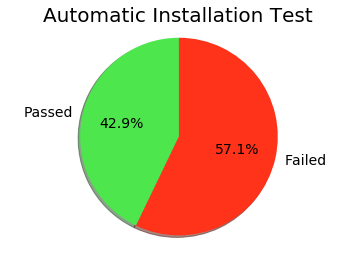

In [98]:
labels = ['Passed', 'Failed']
sizes = [len(pass_status.index), len(fail_status.index)]
values = [my_colors.green, my_colors.red]
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Automatic Installation Test", fontsize=20)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

pl.show()

### FIGURE B.3: Example Provided

In [99]:
#Lets get clean some data for a piechart regarding if Example is Provided
ex_prov_pie = data.groupby(['Example_Provided',]).size()
print ex_prov_pie

Example_Provided
N    31
Y    67
dtype: int64


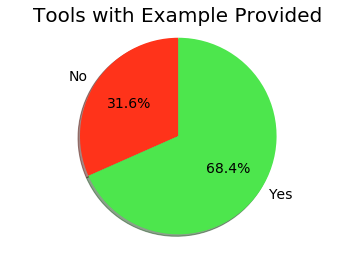

In [100]:
labels = ['No', 'Yes']
sizes = [ex_prov_pie[0], ex_prov_pie[1]]
values = [my_colors.red, my_colors.green]
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Tools with Example Provided", fontsize=20)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.show()

## FIGURE C: Statistical Significance of Citations based on Difficulty of Installation

In [101]:
#Lets get clean some data to get sums for the number of citations
dif_status_mean = data.groupby(['Difficulty_Status',]).mean()
dif_status_std = data.groupby(['Difficulty_Status',]).std()
dif_status_size = data.groupby(['Difficulty_Status',]).size()
dif_status_sum = data.groupby(['Difficulty_Status',]).sum()
dif_status_mean.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install,Portion_Undocumented
Difficulty_Status,,,,,,,,,,
0,65.592593,2012.259259,6.740741,81.000000,10.385391,8.777778,18.866667,6.555556,82.222222,0.228301
1,40.619048,2013.142857,5.857143,672.095238,89.462642,6.000000,12.350000,4.470588,78.571429,0.348607
2,46.060000,2012.060000,6.940000,1061.100000,108.689726,14.181818,2.833333,2.760870,7.800000,0.025604


In [102]:
dif_status_std.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install,Portion_Undocumented
Difficulty_Status,,,,,,,,,,
0,21.175565,2.263296,2.263296,96.218102,11.287159,14.069273,47.485136,6.563914,50.617976,0.318565
1,29.761512,1.878449,1.878449,2056.765663,229.439292,7.848567,12.145066,3.356293,41.867137,0.288425
2,29.122829,2.951375,2.951375,2857.206065,287.123460,15.042553,2.754751,2.822015,4.535574,0.085014


In [103]:
# Custom function to draw the diff bars
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':25,'shrinkB':25,'linewidth':1.5}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

0.0385426170573
0.485458417866
0.0988516868126


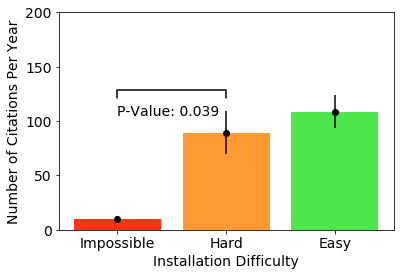

In [108]:
colors = [my_colors.red, my_colors.orange, my_colors.green]
std     = [i for i in dif_status_std["Normalized_citations"]]
means   = [i for i in dif_status_mean["Normalized_citations"]]
ns = [i for i in dif_status_size]

ind  = np.arange(3)    # the x locations for the groups
width= 0.7
labels = ('Impossible', 'Hard', 'Easy')

# Pull the formatting out here
bar_kwargs = {'width':width, 'color':'y', 'linewidth':2, 'zorder':5}
err_kwargs = {'zorder':0, 'fmt':None, 'linewidth':2, 'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, means, color=colors)

# Impossible vs Hard 
p_value = stats.ks_2samp(data[(data.Difficulty_Status==0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==1)].Normalized_citations.tolist())
label_diff(0,1, 'P-Value: %.3f' %(p_value[1]), ind, means)
print p_value[1]

# Hard vs Easy
p_value = stats.ks_2samp(data[(data.Difficulty_Status==1)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
# label_diff(1,2,'P-Value: %.3f' %(p_value[1]), ind, means)
print p_value[1]

# Easy vs Impossible
p_value = stats.ks_2samp(data[(data.Difficulty_Status==0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
# label_diff(0,2,'P-Value: %.3f' %(p_value[1]), ind, means)
print p_value[1]


plt.errorbar(ind, means, yerr=[x/math.sqrt(n) for x,n in zip(means,ns)], fmt='o', color='black')
plt.ylim(ymax=200) 
# plt.title("Number of Citations Per Year Based on Tool Installation Difficulty\n", fontsize=14)
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Installation Difficulty")
plt.xticks(ind, labels, color='k')
plt.show()

0.0385426170573


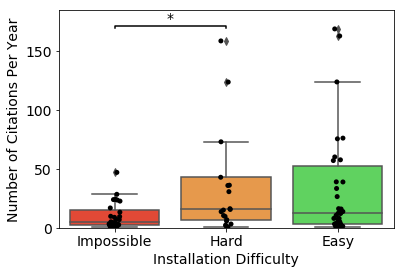

In [119]:
sns.boxplot(x="Difficulty_Status", y="Normalized_citations", data=data, 
            palette=[my_colors.red, my_colors.orange, my_colors.green])

sns.stripplot(x="Difficulty_Status", y="Normalized_citations", 
              palette=['black'], data=data,  jitter=0.05)

x1, x2 = 0, 1
y, h, col = 170, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status == 1)].Normalized_citations.tolist())
print p_value[1]

# Impossible vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]

# Hard vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 1)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col)

plt.ylim(ymax=185) 
plt.ylim(ymin=0) 
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Installation Difficulty")
plt.xticks(ind, labels, color='k')
plt.show()

0.0385426170573


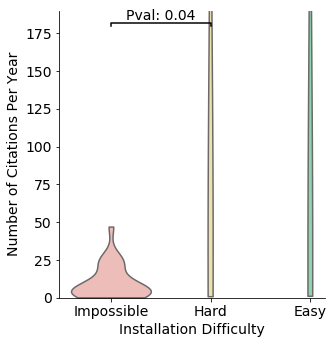

In [59]:
sns.catplot(x="Difficulty_Status", y="Normalized_citations", data=data, cut=0, 
            kind="violin", palette=['#F5B7B1', '#F9E79F', '#82E0AA'], inner=None)


x1, x2 = 0, 1
y, h, col = 180, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status == 1)].Normalized_citations.tolist())
print p_value[1]

# Impossible vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]

# Hard vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 1)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]

plt.text((x1+x2)*.5, y+h, 'Pval: %.2f'%(p_value[1]), ha='center', va='bottom', color=col)

plt.ylim(ymax=190) 
plt.ylim(ymin=0) 
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Installation Difficulty")
plt.xticks(ind, labels, color='k')
plt.show()

## FIGURE D: Automatic Installation Test vs Installation Time

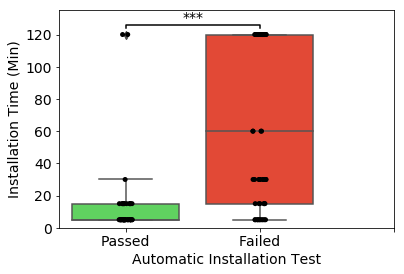

In [118]:
data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

sns.boxplot(x="auto_test", y="Time_To_Install", data=data, palette=[my_colors.green, my_colors.red])
sns.stripplot(x="auto_test", y="Time_To_Install", data=data, palette=["black"], jitter=0.05)

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
                         data[(data.auto_test=='Pass')].Time_To_Install.tolist())

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col)


plt.ylim(ymin=0) 
plt.ylim(ymax=135) 
plt.xlabel("Automatic Installation Test")
plt.ylabel("Installation Time (Min)")
plt.xticks(ind, ["Passed", "Failed"], color='k')
plt.show()

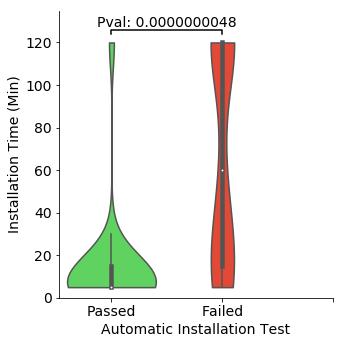

In [115]:
data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

# sns.catplot(x="auto_test", y="Time_To_Install", data=data, palette=['#82E0AA', '#F5B7B1'], kind="violin")

sns.catplot(x="auto_test", y="Time_To_Install", data=data, palette=[my_colors.green, my_colors.red], kind="violin", cut=0)
# sns.stripplot(x="auto_test", y="Time_To_Install", data=data, palette=['green', 'red'], jitter=0.05)

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
                         data[(data.auto_test=='Pass')].Time_To_Install.tolist())

plt.text((x1+x2)*.5, y+h, 'Pval: %.10f'%(p_value[1]), ha='center', va='bottom', color=col)


plt.ylim(ymin=0) 
plt.ylim(ymax=135) 
plt.xlabel("Automatic Installation Test")
plt.ylabel("Installation Time (Min)")
plt.xticks(ind, ["Passed", "Failed"], color='k')
plt.show()

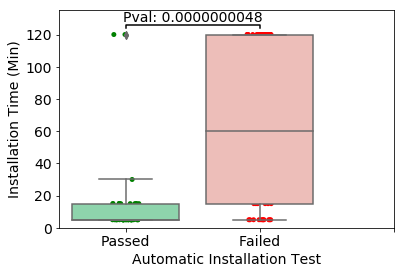

In [62]:
data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

sns.boxplot(x="auto_test", y="Time_To_Install", data=data, palette=['#82E0AA', '#F5B7B1'])
sns.stripplot(x="auto_test", y="Time_To_Install", data=data, palette=['green', 'red'], zorder=0.05)

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
                         data[(data.auto_test=='Pass')].Time_To_Install.tolist())

plt.text((x1+x2)*.5, y+h, 'Pval: %.10f'%(p_value[1]), ha='center', va='bottom', color=col)


plt.ylim(ymin=0) 
plt.ylim(ymax=135) 
plt.xlabel("Automatic Installation Test")
plt.ylabel("Installation Time (Min)")
plt.xticks(ind, ["Passed", "Failed"], color='k')
plt.show()

## FIGURE E: Effect of Bioconda Package Manger on Installation Time

In [63]:
## TODO Be sure No = all other groups besides Other and Bioconda

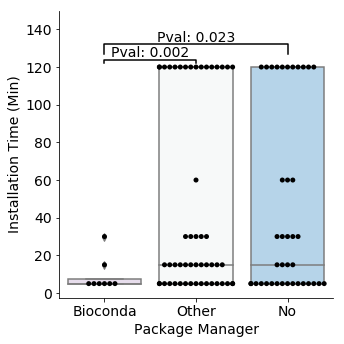

In [64]:
conditions = [
    (data['Source_'] == 'Bioconda'),
     (data['Source_'] == 'Other')]
choices = ['Bioconda', 'Other']
data['custom_source'] = np.select(conditions, choices, default='No')
sns.catplot(x="custom_source", y="Time_To_Install", kind="box", data=data, palette=["#E8DAEF","#F7F9F9", "#AED6F1"])
# sns.swarmplot(x="custom_source", y="Time_To_Install", data=data, palette=["#7D3C98","#717D7E", "#2874A6"])
sns.swarmplot(x="custom_source", y="Time_To_Install", data=data, palette=["black","black", "black"])

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='Other')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.3f'%(p_value[1]), ha='center', va='bottom', color=col)

x1, x2 = 0, 2
y, h, col = data['Time_To_Install'].max() + 7, 5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='No')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.3f'%(p_value[1]), ha='center', va='bottom', color=col)

plt.ylim(ymax=150) 
plt.xlabel("Package Manager")
plt.ylabel("Installation Time (Min)")
plt.show()

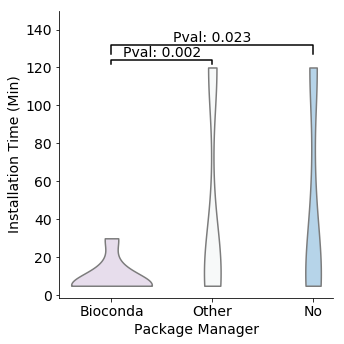

In [65]:

sns.catplot(x="custom_source", y="Time_To_Install", kind="violin",
            data=data, palette=["#E8DAEF","#F7F9F9", "#AED6F1"],fliersize=0, cut=0, inner=None)


x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='Other')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.3f'%(p_value[1]), ha='center', va='bottom', color=col)

x1, x2 = 0, 2
y, h, col = data['Time_To_Install'].max() + 7, 5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='No')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.3f'%(p_value[1]), ha='center', va='bottom', color=col)

plt.ylim(ymax=150) 
plt.xlabel("Package Manager")
plt.ylabel("Installation Time (Min)")
plt.show()

## FIGURE F: Portion of Undocumented Commands Compared to Difficulty Status

In [66]:
data.head(10)

,Unnamed:_0,ID,Domain,Journal_of_Molecular_Diagnostics,Year,Lapsed_,Language,Update,Source_,Source_Control,...,Releases,Error._Hard_codding._Broken_invalid_link._Yes/No,Outdated_Dependency,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Example_Provided,auto_test,custom_source
0,1,mp1,mapping,Genome Biology,2009,10,C++,2017,Bioconda,Y,...,30.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
1,2,mp2,mapping,Bioinformatics,2013,6,C++,2017,Bioconda,Y,...,36.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
2,3,mp3,mapping,Bioinformatics,2012,7,C++,2014,Bioconda,N,...,16.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
3,4,mp4,mapping,Genome Biology,2004,15,C++,2017,Bioconda,N,...,7.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
4,5,mp5,mapping,Bioinformatics,2009,10,C,2011,Bioconda,N,...,12.0,N,N,1.0,1.0,15,2,Y,Pass,Bioconda
5,6,mp6,mapping,PLOS Comp Bio,2009,10,C++,2012,Bioconda,N,...,21.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
6,7,mp7,mapping,Nature Genetics,2009,10,C,2014,Bioconda,N,...,23.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
7,8,mp8,mapping,Bioinformatics,2008,11,C,2008,Other,N,...,23.0,N,N,3.0,3.0,5,2,Y,Pass,Other
8,9,mp9,mapping,Genome Biology,2013,6,C++,2016,Other,N,...,17.0,N,N,22.0,4.0,30,1,Y,Fail,Other
9,10,mp10,mapping,Nature Methods,2015,4,C++,2017,Bioconda,Y,...,7.0,Y,N,1.0,1.0,30,1,Y,Pass,Bioconda


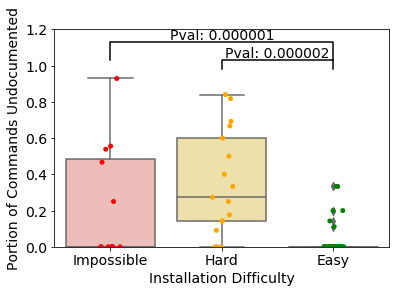

In [67]:
data["Portion_Undocumented"] = (data["Commands"]-data["Commands_Listed"])/(data["Commands"] + data["Commands_Listed"])
sns.boxplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=['#F5B7B1', '#F9E79F', '#82E0AA'])
sns.stripplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=['red', 'orange', 'green'])
labels = ["Impossible", "Hard", "Easy"]
ind  = np.arange(3)

x1, x2 = 0, 2
y, h, col = data['Portion_Undocumented'].max() + 0.1, 0.1, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==0)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.6f'%(p_value[1]), ha='center', va='bottom', color=col)


x1, x2 = 1, 2
y, h, col = data['Portion_Undocumented'].max() + 0.05, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==1)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.6f'%(p_value[1]), ha='center', va='bottom', color=col)

plt.ylim(ymax=1.2) 
plt.ylim(ymin=0) 
plt.xlabel("Installation Difficulty")
plt.ylabel("Portion of Commands Undocumented")
plt.xticks(ind, labels, color='k')
plt.show()

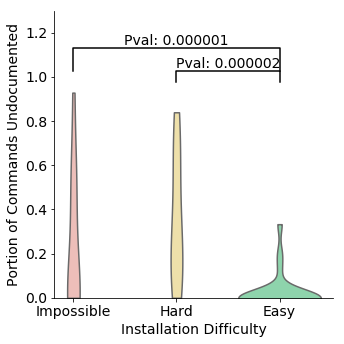

In [68]:
data["Portion_Undocumented"] = (data["Commands"]-data["Commands_Listed"])/(data["Commands"] + data["Commands_Listed"])
sns.catplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=['#F5B7B1', '#F9E79F', '#82E0AA'], 
            kind="violin", cut=0, inner=None)
# sns.stripplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=['black', 'black', 'black'], jitter=0.05)
labels = ["Impossible", "Hard", "Easy"]
ind  = np.arange(3)
x1, x2 = 0, 2
y, h, col = data['Portion_Undocumented'].max() + 0.1, 0.1, 'k'
# print data['Portion_Undocumented'].max()
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==0)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.6f'%(p_value[1]), ha='center', va='bottom', color=col)

x1, x2 = 1, 2
y, h, col = data['Portion_Undocumented'].max() + 0.05, 0.05, 'k'
# print data['Portion_Undocumented'].max()
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==1)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.6f'%(p_value[1]), ha='center', va='bottom', color=col)

plt.ylim(ymax=1.3) 
plt.ylim(ymin=0) 
plt.xlabel("Installation Difficulty")
plt.ylabel("Portion of Commands Undocumented")
plt.xticks(ind, labels, color='k', fontsize=14)
plt.show()

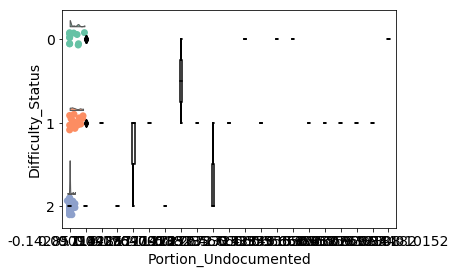

In [78]:
import ptitprince as pt
ax=pt.half_violinplot(data = data, palette = "Set2", bw=.2,  linewidth=1,cut=0., orient="h",\
                   scale="area", width=.8, inner=None,y="Difficulty_Status", x="Portion_Undocumented")
ax=sns.stripplot(data=data, palette="Set2", edgecolor="white",size=7, orient="h",\
                 y="Difficulty_Status", x="Portion_Undocumented",jitter=1,zorder=0)
ax=sns.boxplot(data=data, color="black",width=.15, y="Difficulty_Status", x="Portion_Undocumented",zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1)

## FIGURE NEW: Suggested by Serghei to see if statistical significance between citations based on example provided

In [ ]:
#Lets get clean some data to get sums for the number of citations
ex_status_mean = data.groupby(['Example_Provided',]).mean()
ex_status_std = data.groupby(['Example_Provided',]).std()
ex_status_size = data.groupby(['Example_Provided',]).size()
ex_status_sum = data.groupby(['Example_Provided',]).sum()
ex_status_mean.head()

In [ ]:
colors = ('yellow', 'blue')
std     = [i for i in ex_status_std["Normalized_citations"]]
means   = [i for i in ex_status_mean["Normalized_citations"]]
ns = [i for i in ex_status_size]

ind  = np.arange(2)    # the x locations for the groups
width= 0.7
labels = ('No', 'Yes')

# Pull the formatting out here
bar_kwargs = {'width':width, 'color':'y', 'linewidth':2, 'zorder':5}
err_kwargs = {'zorder':0, 'fmt':None, 'linewidth':2, 'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, means, color=colors)

p_value = stats.ks_2samp(data[(data.Example_Provided=='Y')].Normalized_citations.tolist(),
                         data[(data.Example_Provided=='N')].Normalized_citations.tolist())
label_diff(0,1, 'P-Value: %.3f' %(p_value[1]), ind, means)


plt.errorbar(ind, means, yerr=[x/math.sqrt(n) for x,n in zip(means,ns)], fmt='o', color='black')
plt.ylim(ymax=200) 
# plt.title("Number of Citations Per Year Based on Tool Installation Difficulty\n", fontsize=14)
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Test Example Provided")
plt.xticks(ind, labels, color='k')
plt.show()

In [ ]:
ax = sns.boxplot(x="Example_Provided", y="Normalized_citations", data=data, palette=["blue", "yellow"])
sns.swarmplot(x="Example_Provided", y="Normalized_citations", palette=["blue", "yellow"], data=data)
ax.set_ylim(0,280)
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Test Example Provided")
labels = ('Yes', 'No')
plt.xticks(ind, labels, color='k')


x1, x2 = 0, 1
y, h, col = 250 + 7, 4, 'k'
# print data['Portion_Undocumented'].max()
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Example_Provided=='Y')].Normalized_citations.tolist(),
                         data[(data.Example_Provided=='N')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.6f'%(p_value[1]), ha='center', va='bottom', color=col)


plt.show()

In [ ]:
heat = data
g = sns.clustermap(data, col_cluster=False)
